In [27]:
import pandas as pd

# Load data
survey_data = pd.read_csv('nls_emp_survey.csv')
survey_questions = pd.read_excel('nls_survey_questions.xlsx')

# Inspect for data cleaning
print(survey_data.head())
print(survey_data.isnull().sum())  # Check for missing values
print(survey_data.describe())  # Basic statistics for numerical data

   Response  Employee_ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12
0         1       810081   6   3   5   4   3   6   5   3   5    4    6    4
1         2       512221   2   5   3   3   6   2   3   5   3    2    2    3
2         3       177541   3   2   3   5   2   3   3   2   3    6    3    6
3         4       679938   3   5   3   3   6   2   2   5   2    2    3    2
4         5       777934   3   5   3   5   6   4   4   5   4    6    3    5
Response       0
Employee_ID    0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
dtype: int64
         Response    Employee_ID          Q1          Q2          Q3  \
count  600.000000     600.000000  600.000000  600.000000  600.000000   
mean   300.500000  520995.728333    3.200000    3.545000    3.166667   
std    173.349358  211733.224537    1.273854    1.543355    0.931129   
min  

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize data
numeric_data = survey_data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_data_optimal = pca.fit_transform(scaled_data)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for each PCA component:", explained_variance)

# PCA loadings to interpret each component
loadings = pd.DataFrame(pca.components_, columns=numeric_data.columns, index=[f'PC{i+1}' for i in range(3)])
print("PCA Loadings:\n", loadings)

Explained Variance for each PCA component: [0.31928814 0.2686552  0.17504985]
PCA Loadings:
      Response  Employee_ID        Q1        Q2        Q3        Q4        Q5  \
PC1 -0.021624    -0.016489  0.378188 -0.252274  0.351813  0.070894 -0.259163   
PC2  0.028273     0.009046 -0.222560 -0.277616 -0.249517  0.445305 -0.268732   
PC3 -0.005229    -0.018098 -0.115867  0.383178 -0.139333  0.198775  0.381767   

           Q6        Q7        Q8        Q9       Q10       Q11       Q12  
PC1  0.366796  0.361993 -0.236345  0.355334  0.042220  0.378188  0.064202  
PC2 -0.028516 -0.032003 -0.288794 -0.023212  0.457730 -0.222560  0.441493  
PC3  0.343261  0.360055  0.393233  0.375183  0.194981 -0.115867  0.201044  


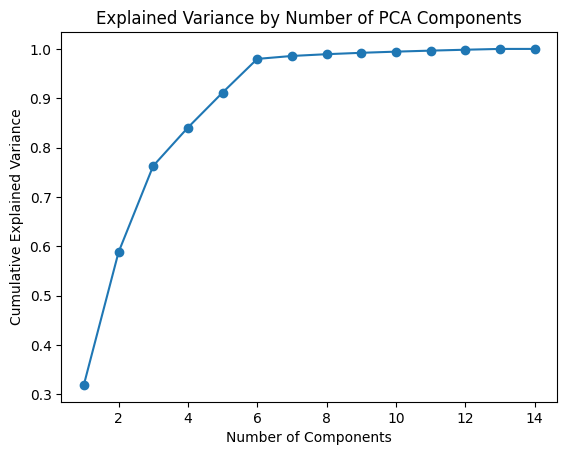

PCA Loadings:
    Response  Employee_ID        Q1        Q2        Q3        Q4        Q5  \
0 -0.021624    -0.016489  0.378188 -0.252274  0.351813  0.070894 -0.259163   
1  0.028273     0.009046 -0.222560 -0.277616 -0.249517  0.445305 -0.268732   
2 -0.005229    -0.018098 -0.115867  0.383178 -0.139333  0.198775  0.381767   
3  0.206652     0.569055  0.289147  0.173321  0.292909  0.248331  0.178962   
4  0.974646    -0.180353 -0.029145 -0.013607 -0.038016 -0.043689 -0.035375   

         Q6        Q7        Q8        Q9       Q10       Q11       Q12  
0  0.366796  0.361993 -0.236345  0.355334  0.042220  0.378188  0.064202  
1 -0.028516 -0.032003 -0.288794 -0.023212  0.457730 -0.222560  0.441493  
2  0.343261  0.360055  0.393233  0.375183  0.194981 -0.115867  0.201044  
3 -0.218212 -0.202890  0.162482 -0.190806  0.234257  0.289147  0.224194  
4  0.042640  0.041826 -0.019717  0.040046 -0.033153 -0.029145 -0.066248  


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize data
numeric_data = survey_data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Scree plot to determine number of components
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.show()

# Extract and interpret the principal components
optimal_components = 5  # Adjust based on scree plot
pca_optimal = PCA(n_components=optimal_components)
pca_data_optimal = pca_optimal.fit_transform(scaled_data)
loadings = pd.DataFrame(pca_optimal.components_, columns=numeric_data.columns)
print("PCA Loadings:\n", loadings)


In [29]:
from sklearn.cluster import KMeans

# Apply k-means with 4 clusters
kmeans_optimal = KMeans(n_clusters=4, n_init=10, random_state=0)
survey_data['Cluster'] = kmeans_optimal.fit_predict(pca_data_optimal)

# Create a DataFrame for cluster centers to interpret each cluster
cluster_centers = pd.DataFrame(kmeans_optimal.cluster_centers_, columns=[f'PC{i+1}' for i in range(3)])
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
         PC1       PC2       PC3
0 -0.523536  0.470050  1.847138
1 -0.030356  1.788733 -1.562756
2  3.845080 -2.353189 -0.332805
3 -3.686050 -3.293416 -1.128718


In [30]:
import pandas as pd

# Load datasets
survey_data = pd.read_csv('nls_emp_survey.csv')
nls_employees = pd.read_csv('nls_employees.csv')
nls_local_offices = pd.read_csv('nls_local_offices.csv')
nls_regional_centers = pd.read_csv('nls_regional_centers.csv')

# Display the columns in each file to confirm column names and structure
print("Columns in survey_data:", survey_data.columns)
print("Columns in nls_employees:", nls_employees.columns)
print("Columns in nls_local_offices:", nls_local_offices.columns)
print("Columns in nls_regional_centers:", nls_regional_centers.columns)


Columns in survey_data: Index(['Response', 'Employee_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12'],
      dtype='object')
Columns in nls_employees: Index(['Employee_ID', 'Office_ID', 'First_Name', 'Last_Name', 'Job_Title',
       'Pay_Grade', 'Department', 'Supervisor_ID', 'Hire_Date',
       'Employment_Status', 'Termination_Date'],
      dtype='object')
Columns in nls_local_offices: Index(['Office_ID', 'Regional_Center_ID', 'Office_Name', 'Address_Line1',
       'City', 'State_Province', 'Postal_Code', 'Country', 'Phone_Number',
       'Email_Address', 'Office_Manager', 'Opening_Date', 'Time_Zone',
       'Latitude', 'Longitude'],
      dtype='object')
Columns in nls_regional_centers: Index(['Regional_Center_ID', 'Region', 'Regional_Center', 'City', 'Country',
       'Key_Industries', 'Primary Language', 'Other Languages',
       'Regulatory_Compliance'],
      dtype='object')


In [31]:
# Merge nls_employees with nls_local_offices on 'Office_ID'
employees_with_offices = pd.merge(nls_employees, nls_local_offices, on="Office_ID", how="left")

# Display the first few rows and columns to verify the merge
print("Merged data - employees with local offices:\n", employees_with_offices.head())
print("Columns after first merge:", employees_with_offices.columns)


Merged data - employees with local offices:
    Employee_ID  Office_ID First_Name Last_Name Job_Title Pay_Grade Department  \
0       128371         23        XXX       XXX       XXX       XXX        XXX   
1       128372         30        XXX       XXX       XXX       XXX        XXX   
2       128376          8        XXX       XXX       XXX       XXX        XXX   
3       128383         27        XXX       XXX       XXX       XXX        XXX   
4       128445         46        XXX       XXX       XXX       XXX        XXX   

  Supervisor_ID Hire_Date Employment_Status  ... State_Province  Postal_Code  \
0           XXX       XXX               XXX  ...              -        60311   
1           XXX       XXX               XXX  ...              -        50088   
2           XXX       XXX               XXX  ...             MI        48201   
3           XXX       XXX               XXX  ...              -       200021   
4           XXX       XXX               XXX  ...              -     

In [32]:
# Merge employees_with_offices with nls_regional_centers on 'Regional_Center_ID'
employees_with_locations = pd.merge(employees_with_offices, nls_regional_centers, on="Regional_Center_ID", how="left")

# Display the first few rows and columns to verify the second merge
print("Merged data - employees with local offices and regional centers:\n", employees_with_locations.head())
print("Columns after second merge:", employees_with_locations.columns)


Merged data - employees with local offices and regional centers:
    Employee_ID  Office_ID First_Name Last_Name Job_Title Pay_Grade Department  \
0       128371         23        XXX       XXX       XXX       XXX        XXX   
1       128372         30        XXX       XXX       XXX       XXX        XXX   
2       128376          8        XXX       XXX       XXX       XXX        XXX   
3       128383         27        XXX       XXX       XXX       XXX        XXX   
4       128445         46        XXX       XXX       XXX       XXX        XXX   

  Supervisor_ID Hire_Date Employment_Status  ... Latitude  Longitude  \
0           XXX       XXX               XXX  ...  50.1109     8.6821   
1           XXX       XXX               XXX  ...   3.1390   101.6869   
2           XXX       XXX               XXX  ...  42.3314   -83.0458   
3           XXX       XXX               XXX  ...  31.2304   121.4737   
4           XXX       XXX               XXX  ...  19.4326   -99.1332   

          Regi

In [33]:
# Filter to keep only the employees who are in the survey data
surveyed_employees_with_locations = employees_with_locations[employees_with_locations['Employee_ID'].isin(survey_data['Employee_ID'])]

# Display a preview of the filtered data
print("Filtered data - only surveyed employees:\n", surveyed_employees_with_locations.head())
print("Number of surveyed employees in the dataset:", surveyed_employees_with_locations.shape[0])


Filtered data - only surveyed employees:
      Employee_ID  Office_ID First_Name Last_Name Job_Title Pay_Grade  \
70        130582          5        XXX       XXX       XXX       XXX   
137       132737          5        XXX       XXX       XXX       XXX   
145       132967          5        XXX       XXX       XXX       XXX   
182       134255          5        XXX       XXX       XXX       XXX   
245       136263         10        XXX       XXX       XXX       XXX   

    Department Supervisor_ID Hire_Date Employment_Status  ... Latitude  \
70         XXX           XXX       XXX               XXX  ...  37.7749   
137        XXX           XXX       XXX               XXX  ...  37.7749   
145        XXX           XXX       XXX               XXX  ...  37.7749   
182        XXX           XXX       XXX               XXX  ...  37.7749   
245        XXX           XXX       XXX               XXX  ...  29.7604   

     Longitude         Region  Regional_Center       City_y Country_y  \
70   -1

In [34]:
# Select only the columns specified
selected_columns = ['Employee_ID', 'Office_ID', 'Office_Name', 'Regional_Center_ID', 
                    'Region', 'Regional_Center', 'City_y', 'Country_y']
surveyed_employees_locations_final = surveyed_employees_with_locations[selected_columns]

# Save the filtered DataFrame to a CSV file
# surveyed_employees_locations_final.to_csv('surveyed_employees_with_full_locations.csv', index=False)

# print("File 'surveyed_employees_with_full_locations.csv' created successfully with the specified columns.")


In [35]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the location data
location_data = pd.read_csv("surveyed_employees_with_full_locations.csv")

# Filter the survey data to only include employees in location_data
survey_data_filtered = survey_data[survey_data['Employee_ID'].isin(location_data['Employee_ID'])]

# Filter the PCA data (assuming pca_data_optimal is already created)
pca_data_filtered = pca_data_optimal[survey_data_filtered.index]

# Run K-means clustering on the filtered PCA data
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data_filtered)

# Create a DataFrame for cluster assignments
cluster_assignments = pd.DataFrame({
    'Employee_ID': survey_data_filtered['Employee_ID'].values,
    'Cluster': cluster_labels
})

# Merge location data with cluster assignments
location_data_with_clusters = location_data.merge(cluster_assignments, on="Employee_ID", how="left")

# Now location_data_with_clusters is ready for visualizations


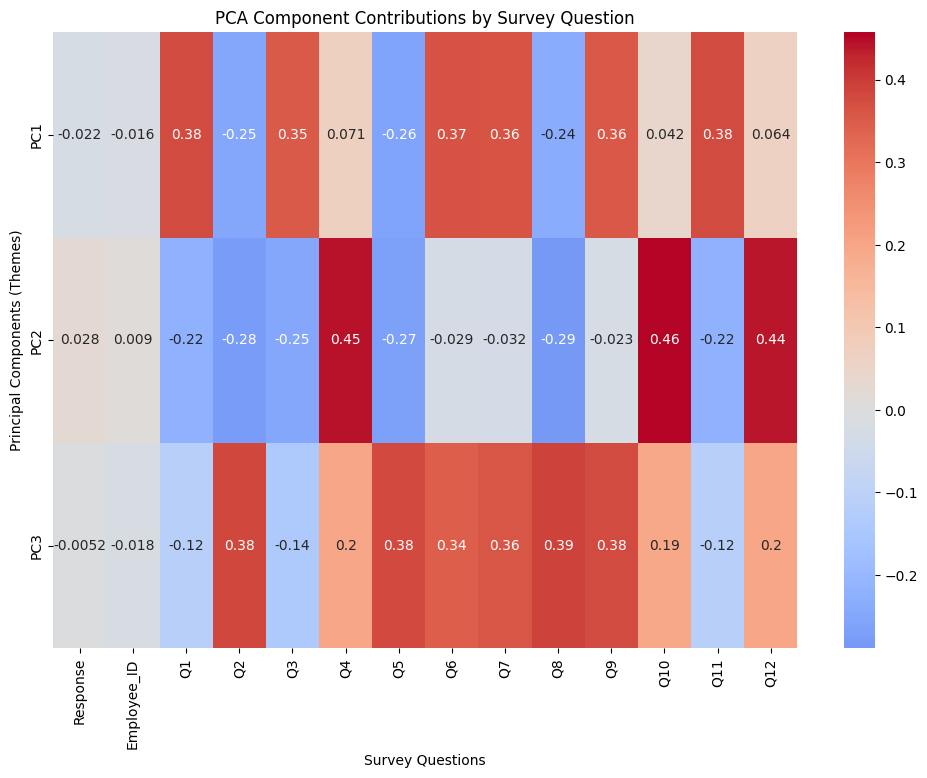

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `location_data_with_clusters` has been created based on your previous steps
# and contains 'Region', 'City_y', and 'Cluster' columns.

# 1. Stacked Bar Chart: Cluster Composition by Region
# region_cluster_counts = location_data_with_clusters.groupby(['Region', 'Cluster']).size().unstack(fill_value=0)
# region_cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
# plt.title("Cluster Composition by Region")
# plt.xlabel("Region")
# plt.ylabel("Number of Employees")
# plt.legend(title="Cluster")
# plt.show()

# 2. Stacked Bar Chart: Cluster Composition by City
# city_cluster_counts = location_data_with_clusters.groupby(['City_y', 'Cluster']).size().unstack(fill_value=0)
# city_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
# plt.title("Cluster Composition by City")
# plt.xlabel("City")
# plt.ylabel("Number of Employees")
# plt.legend(title="Cluster")
# plt.show()

# 3. Heatmap for PCA Component Contributions by Survey Question
# Assuming `loadings` DataFrame from your PCA loadings contains components as rows and questions as columns.

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Component Contributions by Survey Question")
plt.xlabel("Survey Questions")
plt.ylabel("Principal Components (Themes)")
plt.show()


In [44]:
# Group by 'City_y' and 'Cluster', then count the number of occurrences in each group
# city_cluster_counts = location_data_with_clusters.groupby(['City_y', 'Cluster']).size().reset_index(name='Number of Employees')

# # Display the result
# print(city_cluster_counts)


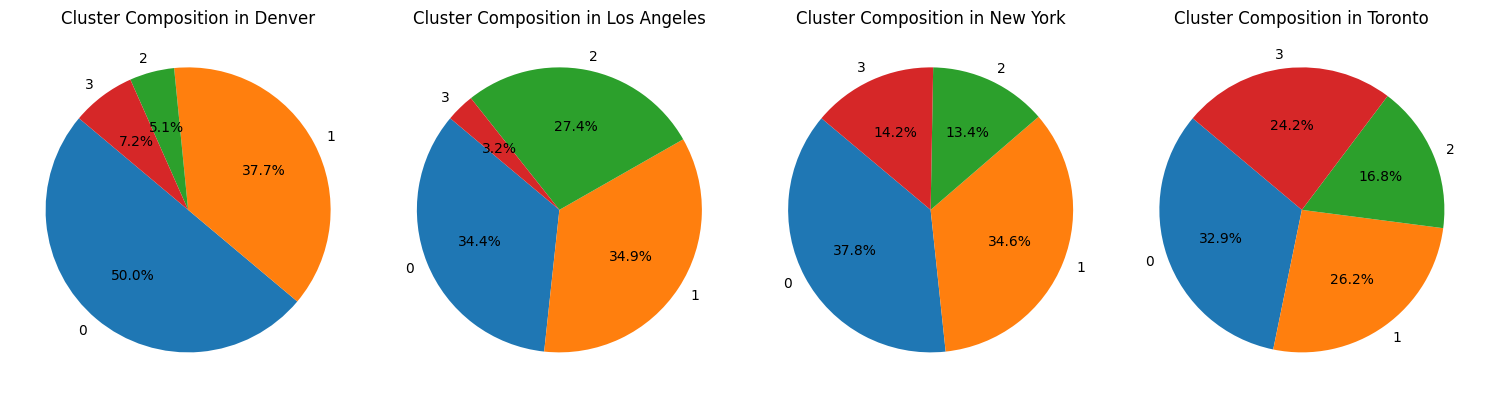

In [38]:
import matplotlib.pyplot as plt

# Group the data by City and Cluster to get the count of each cluster in each city
city_cluster_counts = location_data_with_clusters.groupby(['City_y', 'Cluster']).size().unstack(fill_value=0)

# Create a pie chart for each city
num_cities = len(city_cluster_counts)
fig, axes = plt.subplots(1, num_cities, figsize=(15, 6))

# Ensure `axes` is a list of Axes objects even if there's only one city
if num_cities == 1:
    axes = [axes]

# Loop through each city to create an individual pie chart
for i, city in enumerate(city_cluster_counts.index):
    axes[i].pie(city_cluster_counts.loc[city], labels=city_cluster_counts.columns,
                autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Cluster Composition in {city}')

plt.tight_layout()
plt.show()


In [39]:
# Assuming pca_data_optimal is the PCA-transformed data with 3 components
pca_df = pd.DataFrame(pca_data_optimal, columns=['PC1', 'PC2', 'PC3'])
pca_df['Employee_ID'] = survey_data_filtered['Employee_ID'].values  # Add Employee_ID for merging

# Merge PCA components into survey_data_filtered
survey_data_with_pca = pd.merge(survey_data_filtered, pca_df, on="Employee_ID")


In [40]:
# Merge location data with survey data that includes PCA components and cluster labels
location_data_with_clusters = pd.merge(location_data, survey_data_with_pca[['Employee_ID', 'PC1', 'PC2', 'PC3']], on="Employee_ID", how="left")


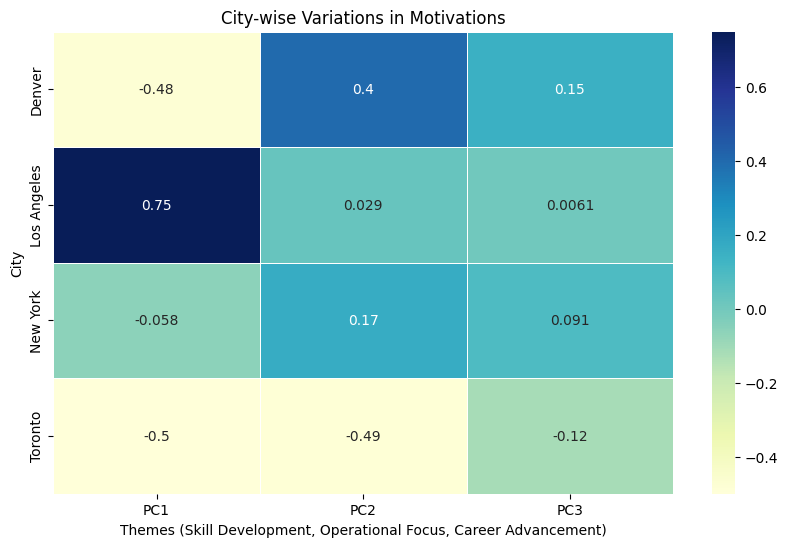

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean theme scores (PCA components) for each city
theme_scores_by_city = location_data_with_clusters.groupby('City_y')[['PC1', 'PC2', 'PC3']].mean()

# Create a heatmap to show theme variations across cities
plt.figure(figsize=(10, 6))
sns.heatmap(theme_scores_by_city, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("City-wise Variations in Motivations")
plt.xlabel("Themes (Skill Development, Operational Focus, Career Advancement)")
plt.ylabel("City")
plt.show()


In [42]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have `survey_data_filtered` and `pca_data_optimal` prepared as in previous steps

# Step 1: Add PCA Components to Survey Data
pca_df = pd.DataFrame(pca_data_optimal, columns=['PC1', 'PC2', 'PC3'])
pca_df['Employee_ID'] = survey_data_filtered['Employee_ID'].values
survey_data_with_pca = pd.merge(survey_data_filtered, pca_df, on="Employee_ID")

# Step 2: Perform K-means Clustering and Add Cluster Labels
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data_optimal)
cluster_assignments = pd.DataFrame({
    'Employee_ID': survey_data_filtered['Employee_ID'].values,
    'Cluster': cluster_labels
})

# Step 3: Merge PCA Components and Cluster Labels with Location Data
survey_data_with_pca = pd.merge(survey_data_with_pca, cluster_assignments, on="Employee_ID")
location_data_with_clusters = pd.merge(location_data, survey_data_with_pca[['Employee_ID', 'PC1', 'PC2', 'PC3', 'Cluster']], on="Employee_ID", how="left")


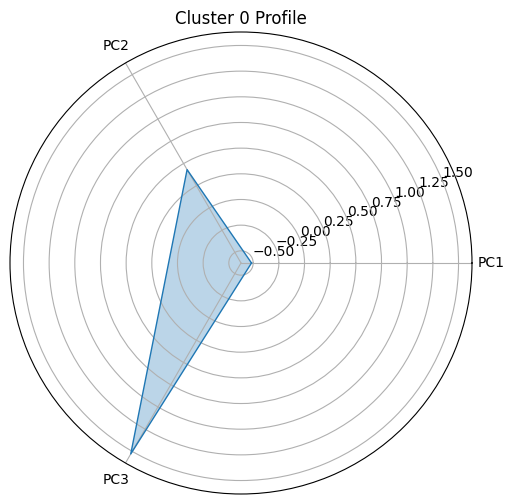

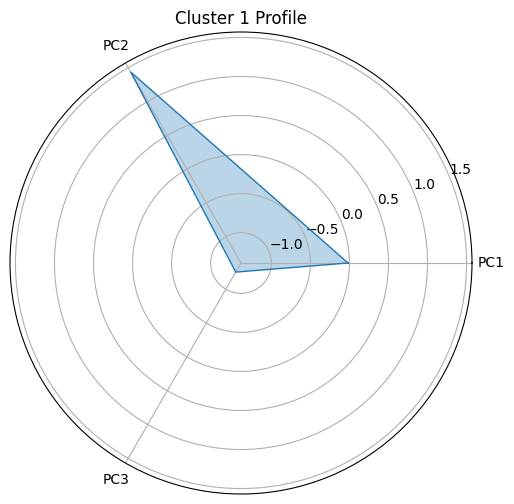

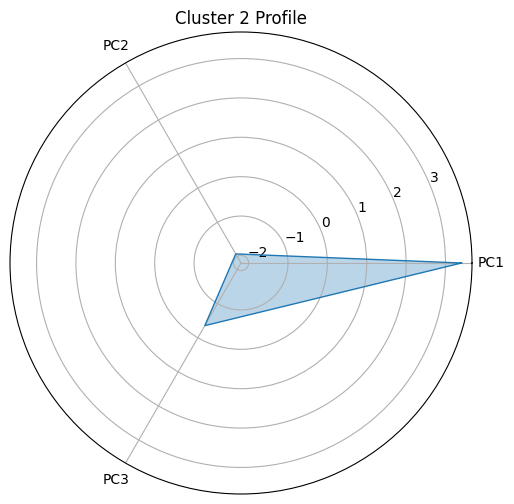

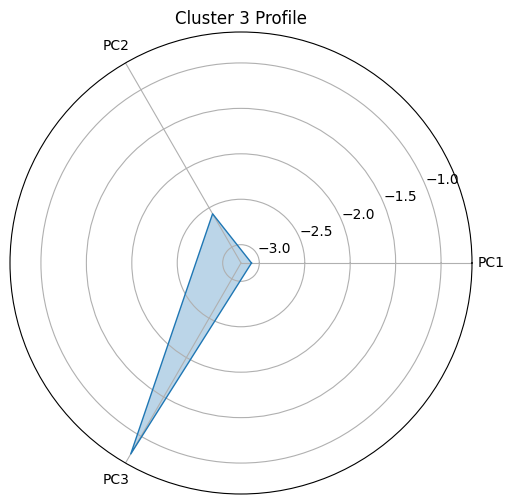

In [43]:
from math import pi
import matplotlib.pyplot as plt

# Calculate the mean theme scores for each cluster
cluster_profiles = location_data_with_clusters.groupby('Cluster')[['PC1', 'PC2', 'PC3']].mean()
categories = list(cluster_profiles.columns)  # PCA themes
N = len(categories)  # Number of themes

# Loop through each cluster to create a radar chart
for cluster, row in cluster_profiles.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Close the circular chart by repeating the first value
    
    # Set up angles for the radar chart
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Plot each radar chart
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.3)
    plt.title(f'Cluster {cluster} Profile')
    plt.show()


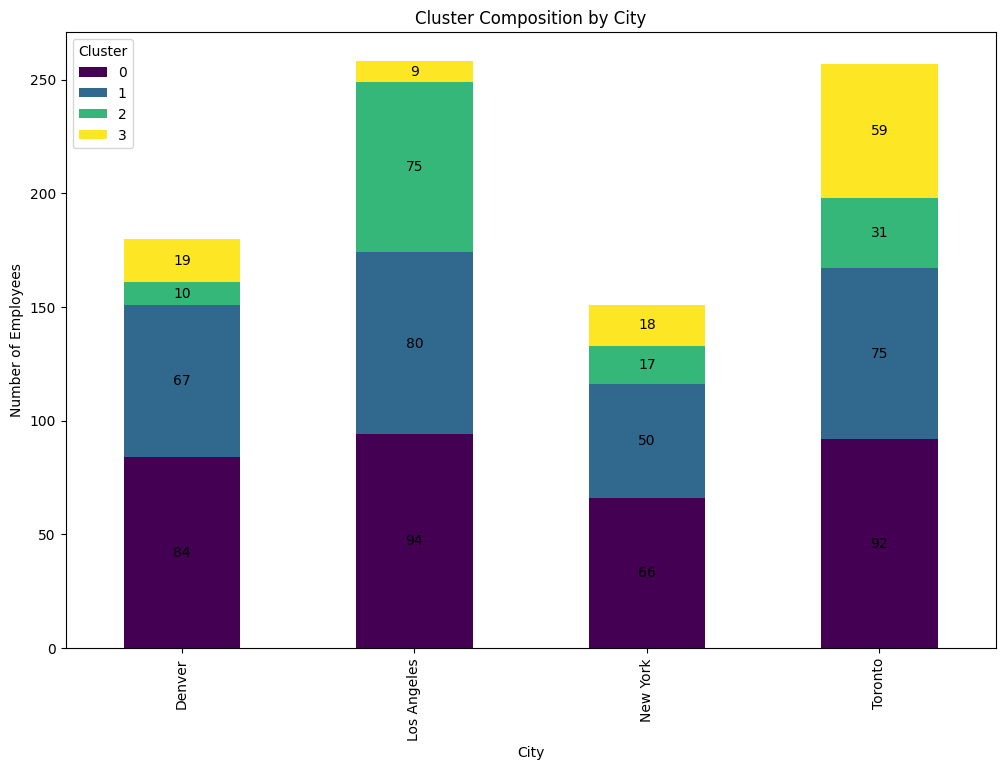

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `location_data_with_clusters` DataFrame is available and contains 'City_y' and 'Cluster' columns
# If your columns are named differently, adjust accordingly.

# Step 1: Calculate the number of employees in each cluster for each city
city_cluster_counts = location_data_with_clusters.groupby(['City_y', 'Cluster']).size().unstack(fill_value=0)

# Step 2: Plot the stacked bar chart
ax = city_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Cluster Composition by City")
plt.xlabel("City")
plt.ylabel("Number of Employees")
plt.legend(title="Cluster")

# Step 3: Add labels for the number of employees on each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Center the labels within each bar segment

plt.show()


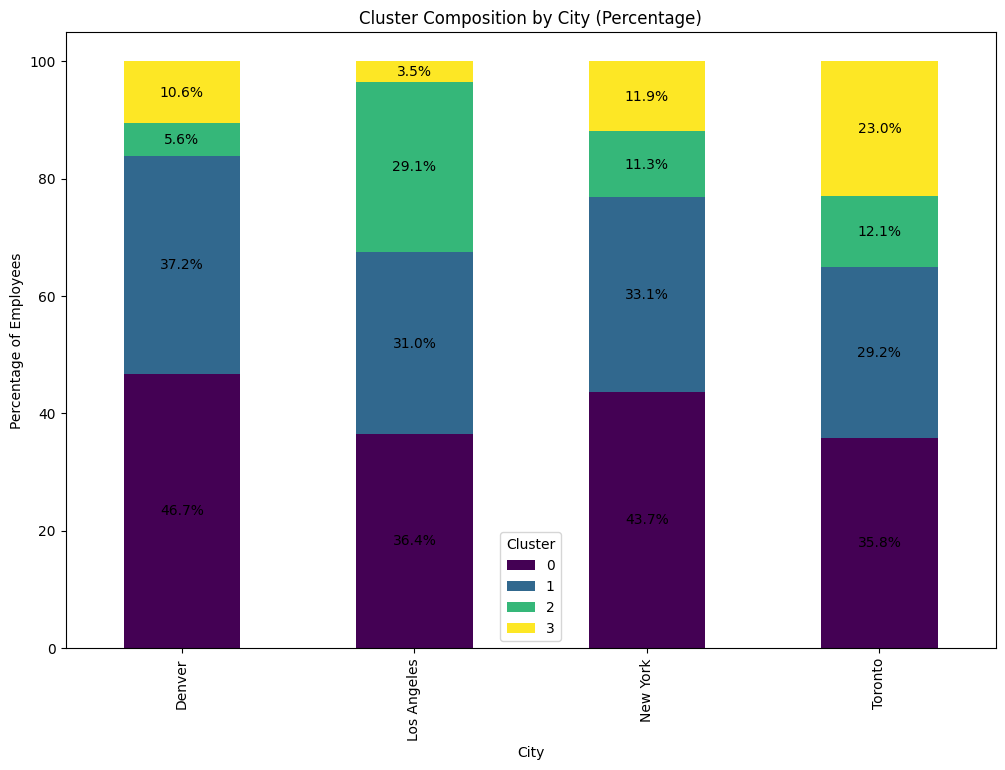

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `location_data_with_clusters` DataFrame is available and contains 'City_y' and 'Cluster' columns

# Step 1: Calculate the number of employees in each cluster for each city
city_cluster_counts = location_data_with_clusters.groupby(['City_y', 'Cluster']).size().unstack(fill_value=0)

# Step 2: Convert the counts to percentages by dividing by the row sums and multiplying by 100
city_cluster_percentages = city_cluster_counts.div(city_cluster_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart with percentages
ax = city_cluster_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Cluster Composition by City (Percentage)")
plt.xlabel("City")
plt.ylabel("Percentage of Employees")
plt.legend(title="Cluster")

# Step 4: Add labels for the percentage on each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')  # Format to 1 decimal place and add '%' symbol

plt.show()
